## Time Series of Pollutants during Canadian Wild Fire Period

The following are time series of pollutants in Providence, measured from the Department of Public Works QuantAQ Sensor in Providence, RI. We look at a time period of the past week from May 30 - June 5.

In [81]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [82]:
wf_dataframe = pd.read_csv("QAQdata_wildfire.csv")
wf_dataframe.head()

,timestamp,id,timestamp_local,sn,rh,temp,lat,lon,device_state,pm1,...,no,no2,o3,pm1_model_id,pm25_model_id,pm10_model_id,co_model_id,no_model_id,no2_model_id,o3_model_id
0,2025-06-05T15:47:14Z,406444375,2025-06-05T11:47:14Z,MOD-00811,43.8,32.9,41.79521,-71.39783,ACTIVE,21.421,...,2.567,22.533,58.828,16235,16236,16237,16133,16140,16147,16126
1,2025-06-05T15:46:14Z,406444374,2025-06-05T11:46:14Z,MOD-00811,44.0,32.7,41.79521,-71.39783,ACTIVE,21.291,...,2.558,22.510,58.305,16235,16236,16237,16133,16140,16147,16126
2,2025-06-05T15:45:14Z,406444372,2025-06-05T11:45:14Z,MOD-00811,44.1,32.7,41.79521,-71.39783,ACTIVE,19.640,...,2.540,22.269,59.623,16235,16236,16237,16133,16140,16147,16126
3,2025-06-05T15:44:14Z,406444373,2025-06-05T11:44:14Z,MOD-00811,44.2,32.6,41.79521,-71.39783,ACTIVE,18.883,...,2.535,22.258,59.895,16235,16236,16237,16133,16140,16147,16126
4,2025-06-05T15:43:14Z,406442117,2025-06-05T11:43:14Z,MOD-00811,44.4,32.5,41.79521,-71.39783,ACTIVE,19.807,...,3.093,22.242,58.821,16235,16236,16237,16133,16140,16147,16126


In [83]:
#remove unnecessary columns
columns_to_remove = ["timestamp", "id", "sn", "lat", "lon", "pm1_model_id", "pm25_model_id", "pm10_model_id", "co_model_id", "no_model_id", "no2_model_id", "o3_model_id"]
wf_dataframe = wf_dataframe.drop(columns=columns_to_remove)
wf_dataframe.head()

,timestamp_local,rh,temp,device_state,pm1,pm25,pm10,co,no,no2,o3
0,2025-06-05T11:47:14Z,43.8,32.9,ACTIVE,21.421,21.957,29.164,857.036,2.567,22.533,58.828
1,2025-06-05T11:46:14Z,44.0,32.7,ACTIVE,21.291,22.127,34.101,863.246,2.558,22.510,58.305
2,2025-06-05T11:45:14Z,44.1,32.7,ACTIVE,19.640,20.462,25.956,849.218,2.540,22.269,59.623
3,2025-06-05T11:44:14Z,44.2,32.6,ACTIVE,18.883,19.653,23.336,844.523,2.535,22.258,59.895
4,2025-06-05T11:43:14Z,44.4,32.5,ACTIVE,19.807,20.692,23.411,840.168,3.093,22.242,58.821


In [84]:
#clean up timestamp values
wf_dataframe["timestamp_local"] = pd.to_datetime(wf_dataframe["timestamp_local"])

wf_dataframe["date"] = wf_dataframe["timestamp_local"].dt.date
wf_dataframe["time"] = wf_dataframe["timestamp_local"].dt.time

wf_dataframe.head()


,timestamp_local,rh,temp,device_state,pm1,pm25,pm10,co,no,no2,o3,date,time
0,2025-06-05 11:47:14+00:00,43.8,32.9,ACTIVE,21.421,21.957,29.164,857.036,2.567,22.533,58.828,2025-06-05,11:47:14
1,2025-06-05 11:46:14+00:00,44.0,32.7,ACTIVE,21.291,22.127,34.101,863.246,2.558,22.510,58.305,2025-06-05,11:46:14
2,2025-06-05 11:45:14+00:00,44.1,32.7,ACTIVE,19.640,20.462,25.956,849.218,2.540,22.269,59.623,2025-06-05,11:45:14
3,2025-06-05 11:44:14+00:00,44.2,32.6,ACTIVE,18.883,19.653,23.336,844.523,2.535,22.258,59.895,2025-06-05,11:44:14
4,2025-06-05 11:43:14+00:00,44.4,32.5,ACTIVE,19.807,20.692,23.411,840.168,3.093,22.242,58.821,2025-06-05,11:43:14


Basic EDA for each column to get better sense of values

In [85]:
#checking timestamp values
wf_dataframe["timestamp_local"].isnull().sum()

np.int64(0)

In [86]:

def plot_box_and_histogram(column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].boxplot(wf_dataframe[column])
    axes[0].set_title(f"{column} Boxplot")
    axes[0].set_ylabel(column)

    axes[1].hist(wf_dataframe[column], bins=30, color="skyblue", edgecolor="black")
    axes[1].set_title(f"{column} Histogram")
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


count    9588.000000
mean        4.086274
std         3.126036
min         0.144000
25%         1.722750
50%         3.268500
75%         5.936250
max        21.421000
Name: pm1, dtype: float64


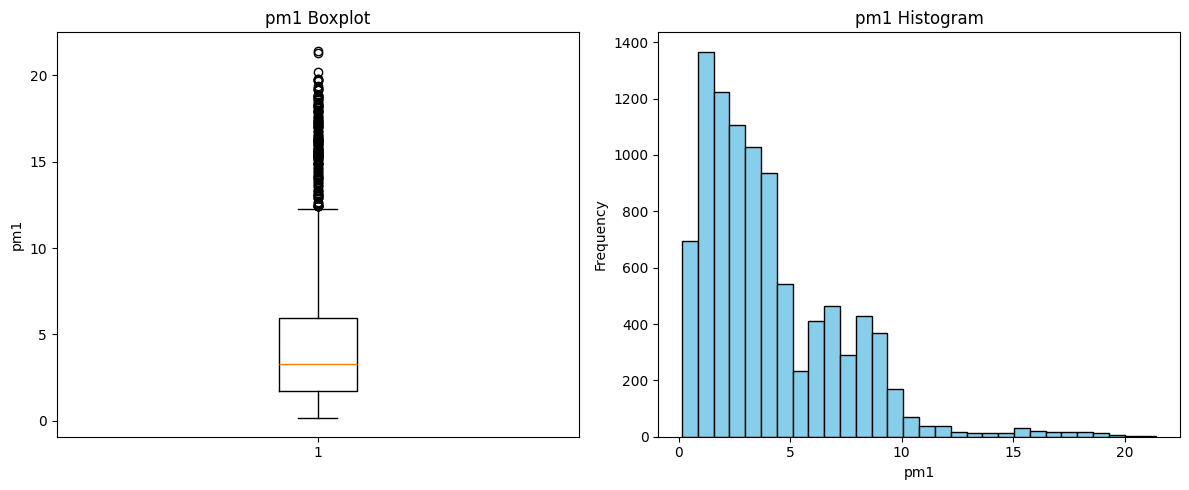

In [87]:
#pm1
print(wf_dataframe["pm1"].describe())
plot_box_and_histogram("pm1")

count    9588.000000
mean        4.574156
std         3.334846
min         0.259000
25%         1.968000
50%         3.763000
75%         6.652500
max        22.615000
Name: pm25, dtype: float64


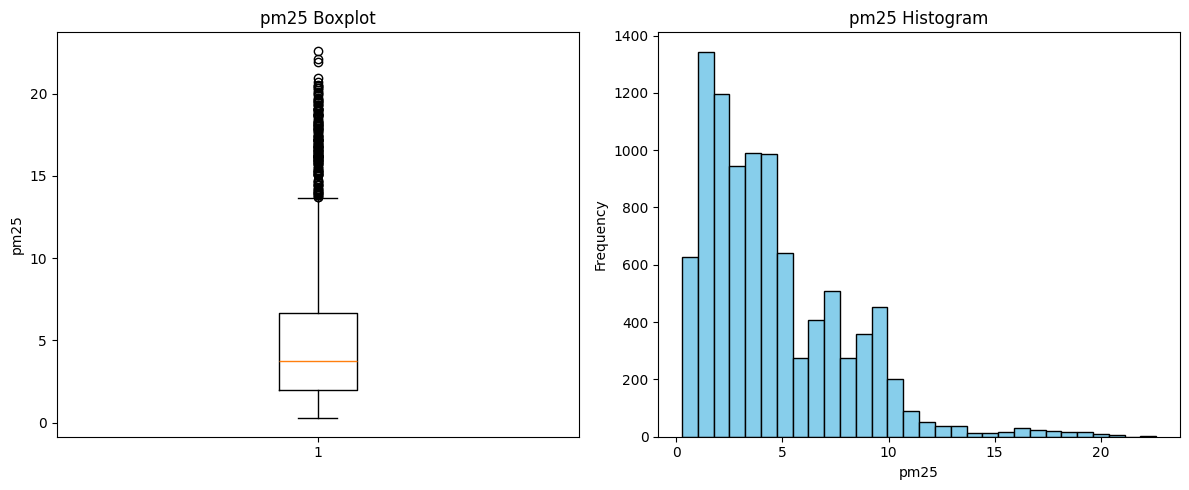

In [88]:
#pm25
print(wf_dataframe["pm25"].describe())
plot_box_and_histogram("pm25")

count    9588.000000
mean       10.637891
std        10.230097
min         0.270000
25%         4.228750
50%         8.665500
75%        14.193250
max       320.180000
Name: pm10, dtype: float64


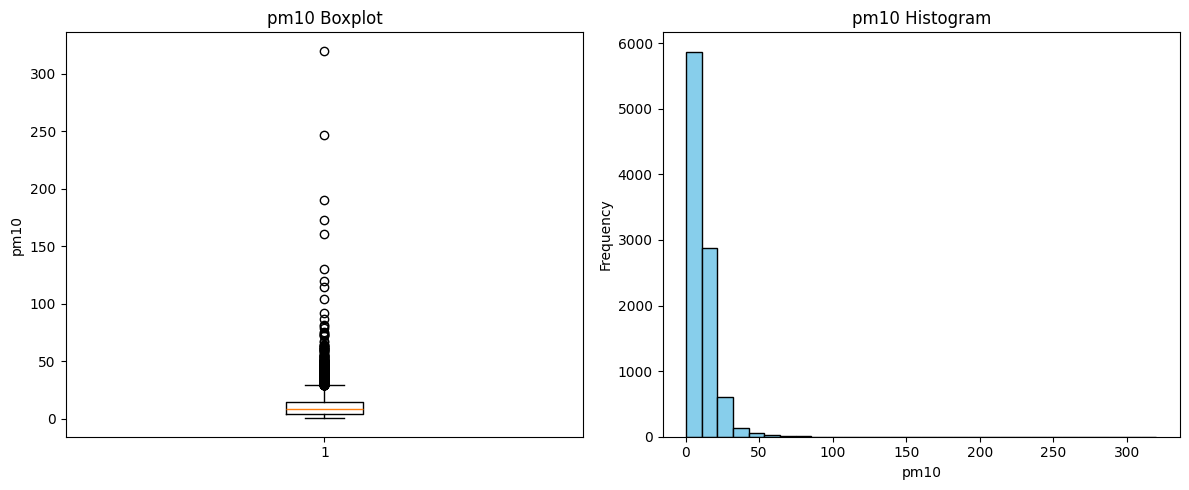

In [89]:
#pm10
print(wf_dataframe["pm10"].describe())
plot_box_and_histogram("pm10")

count    9588.000000
mean      731.959965
std        73.069452
min       481.790000
25%       680.407750
50%       720.414500
75%       768.285000
max      1675.909000
Name: co, dtype: float64


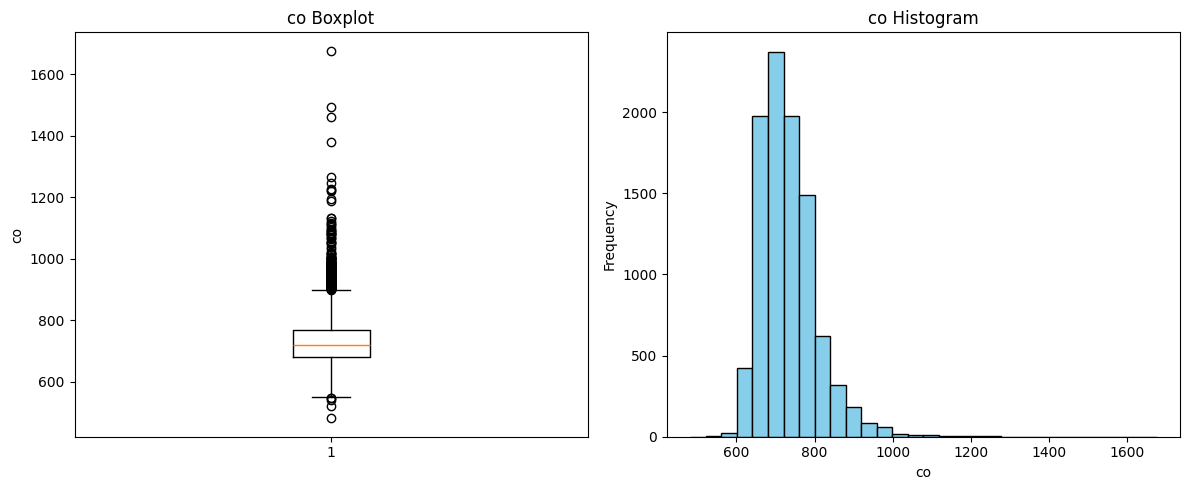

In [90]:
#co
print(wf_dataframe["co"].describe())
plot_box_and_histogram("co")

count    9588.000000
mean        2.331453
std         0.800912
min         1.467000
25%         1.863000
50%         2.245000
75%         2.603000
max        34.872000
Name: no, dtype: float64


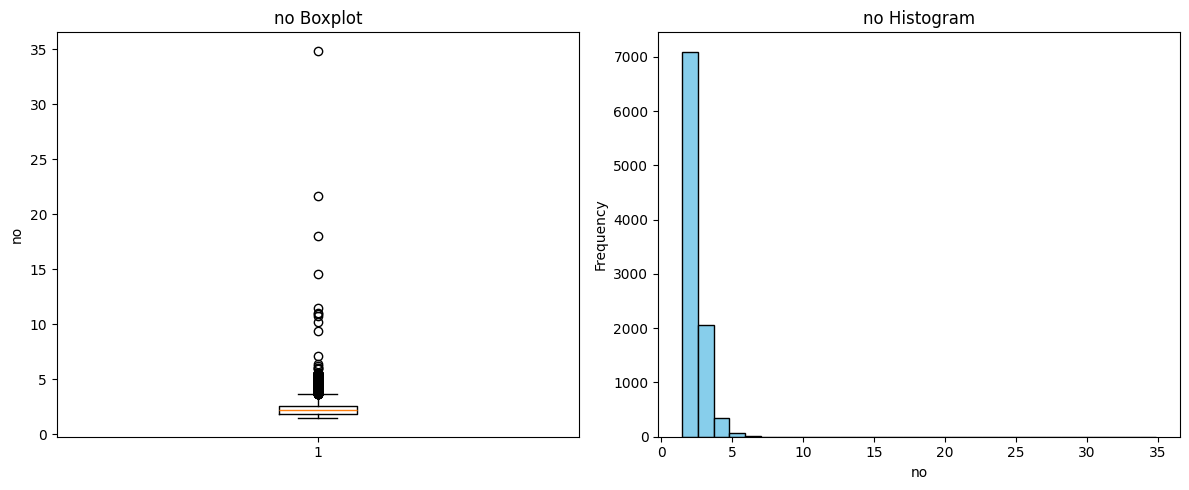

In [91]:
#no
print(wf_dataframe["no"].describe())
plot_box_and_histogram("no")

count    9588.000000
mean       13.024347
std         6.662313
min         1.910000
25%         7.568750
50%        10.926500
75%        19.740000
max        33.054000
Name: no2, dtype: float64


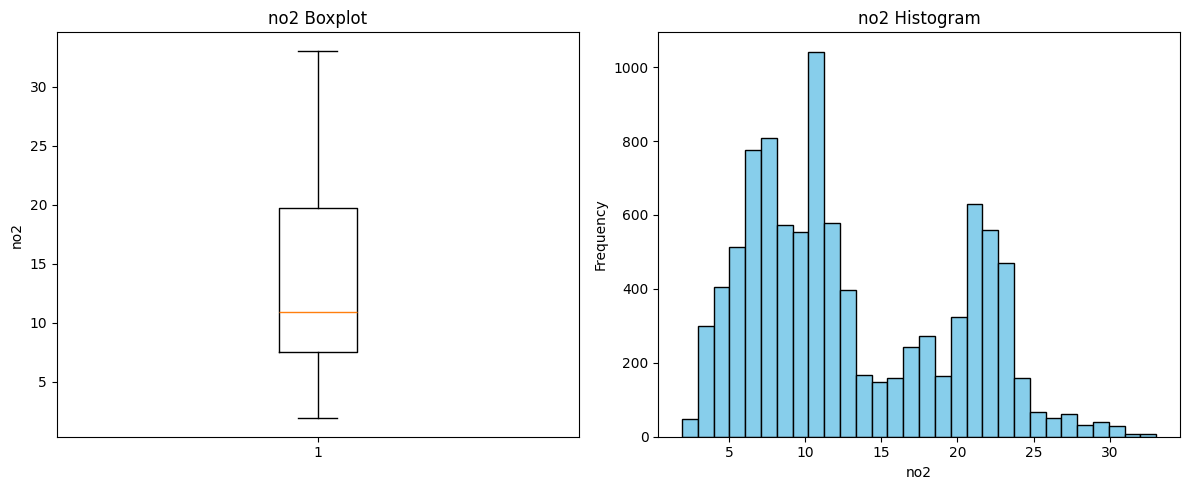

In [92]:
#no2
print(wf_dataframe["no2"].describe())
plot_box_and_histogram("no2")

count    9588.000000
mean       42.860209
std         7.813903
min        18.215000
25%        36.303000
50%        43.197000
75%        48.425250
max        63.089000
Name: o3, dtype: float64


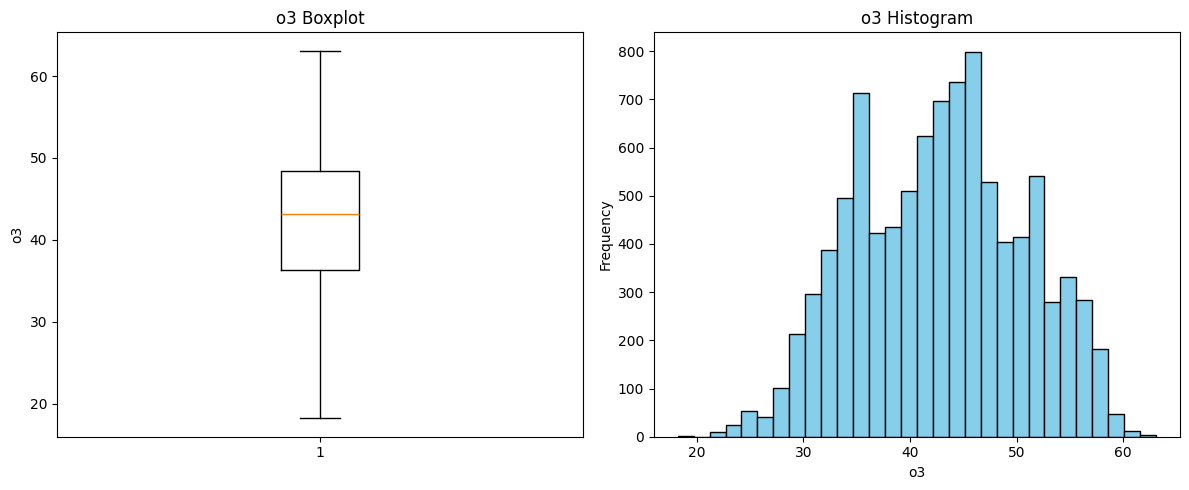

In [93]:
#o3
print(wf_dataframe["o3"].describe())
plot_box_and_histogram("o3")

## Time Series Plots


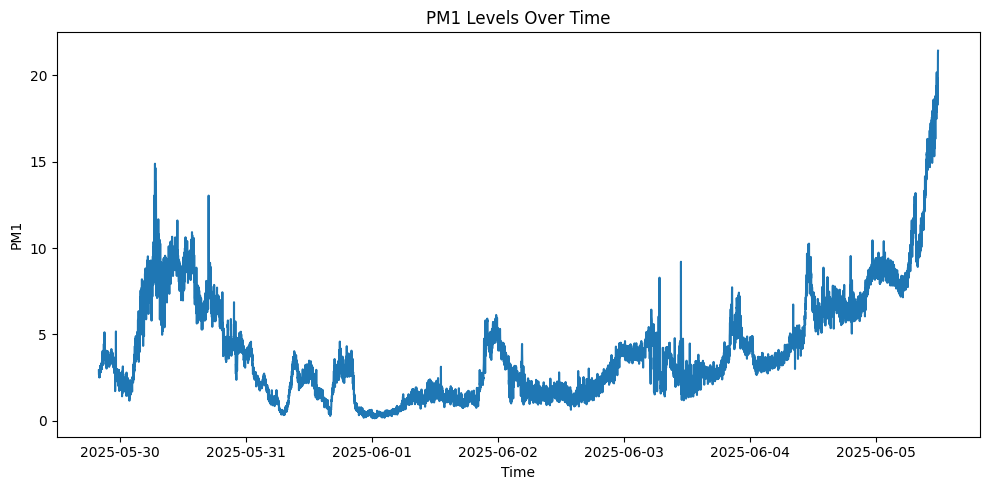

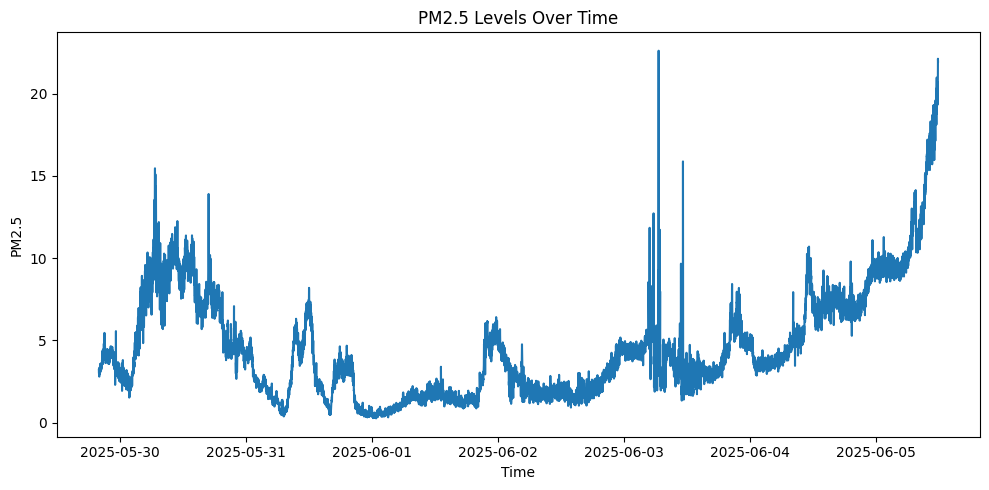

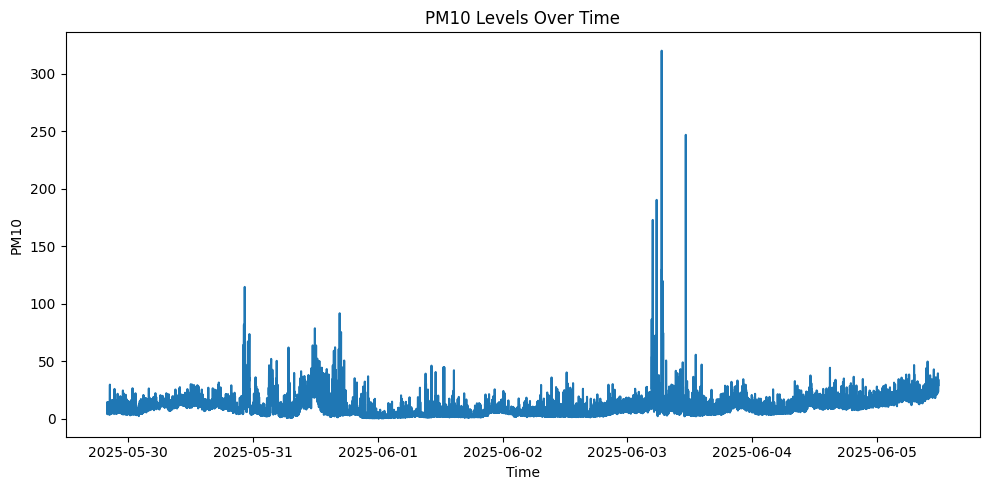

In [94]:
#pm1
plt.figure(figsize=(10, 5))
plt.plot(wf_dataframe["timestamp_local"], wf_dataframe["pm1"])
plt.xlabel("Time")
plt.ylabel("PM1")
plt.title("PM1 Levels Over Time")
plt.tight_layout()
plt.show()

#pm25
plt.figure(figsize=(10, 5))
plt.plot(wf_dataframe["timestamp_local"], wf_dataframe["pm25"])
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.title("PM2.5 Levels Over Time")
plt.tight_layout()
plt.show()

#pm10
plt.figure(figsize=(10, 5))
plt.plot(wf_dataframe["timestamp_local"], wf_dataframe["pm10"])
plt.xlabel("Time")
plt.ylabel("PM10")
plt.title("PM10 Levels Over Time")
plt.tight_layout()
plt.show()

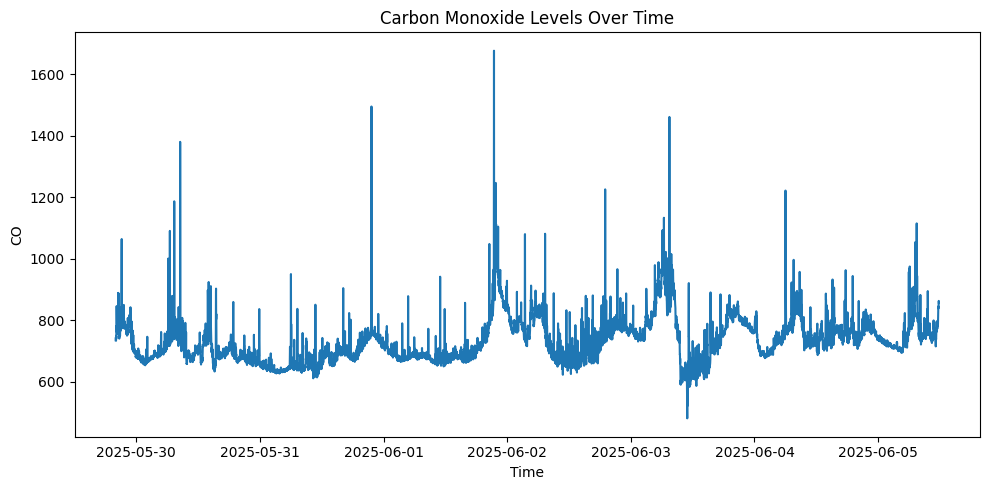

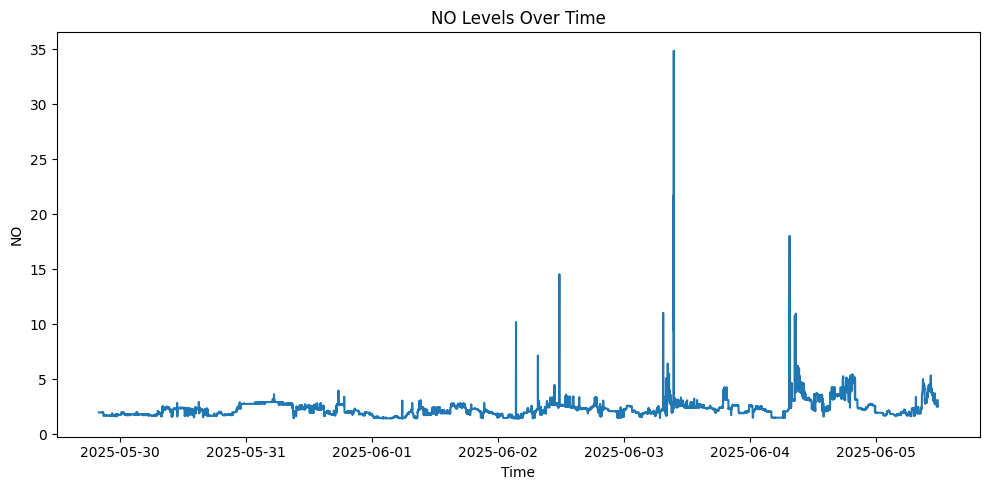

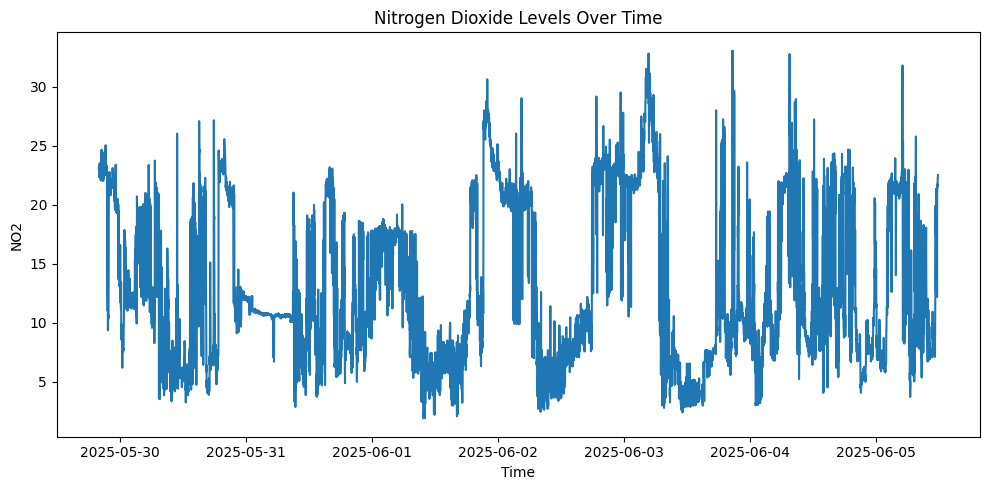

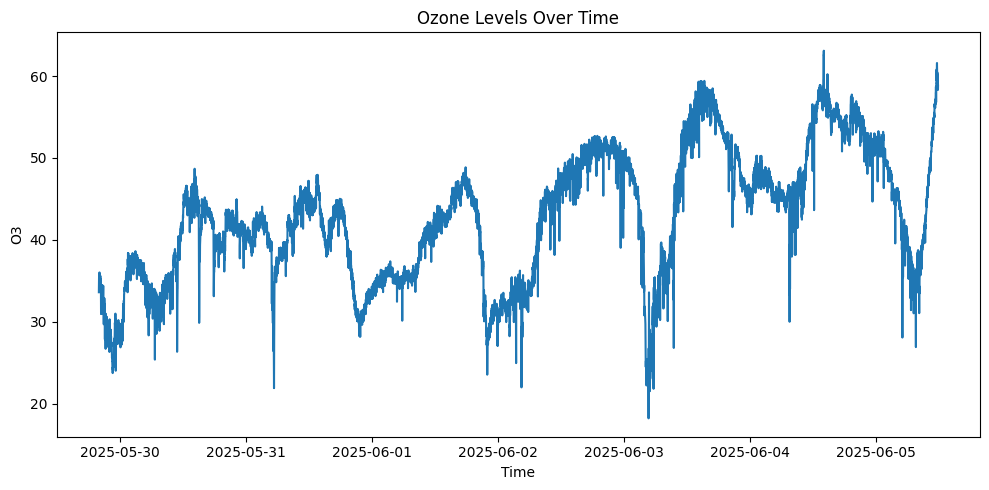

In [95]:
#co
plt.figure(figsize=(10, 5))
plt.plot(wf_dataframe["timestamp_local"], wf_dataframe["co"])
plt.xlabel("Time")
plt.ylabel("CO")
plt.title("Carbon Monoxide Levels Over Time")
plt.tight_layout()
plt.show()

#no
plt.figure(figsize=(10, 5))
plt.plot(wf_dataframe["timestamp_local"], wf_dataframe["no"])
plt.xlabel("Time")
plt.ylabel("NO")
plt.title("NO Levels Over Time")
plt.tight_layout()
plt.show()

#no2
plt.figure(figsize=(10, 5))
plt.plot(wf_dataframe["timestamp_local"], wf_dataframe["no2"])
plt.xlabel("Time")
plt.ylabel("NO2")
plt.title("Nitrogen Dioxide Levels Over Time")
plt.tight_layout()
plt.show()

#o3
plt.figure(figsize=(10, 5))
plt.plot(wf_dataframe["timestamp_local"], wf_dataframe["o3"])
plt.xlabel("Time")
plt.ylabel("O3")
plt.title("Ozone Levels Over Time")
plt.tight_layout()
plt.show()

## Basic EDA Conclusions

There definitely seems to be a clear increase in PM2.5 and PM1 in the air at around midnight on Wednesday June 4. This is when local (Providence based) news stations started reporting about potential smoke from the wildfires. Many online maps exist of mapping this air quality, but it was hard to pinpoint exactly when smoke was detected in Providence using these websites. Could estimate maybe some time in the afternoon on the 3rd?

Also seems to be some outlier data in PM2.5 and 10, maybe worth removing this data? Disappointingly, could not find any real trend in GHG measurements, except maybe a slight increase in average daily ozone? See code below that averages it out each hour.

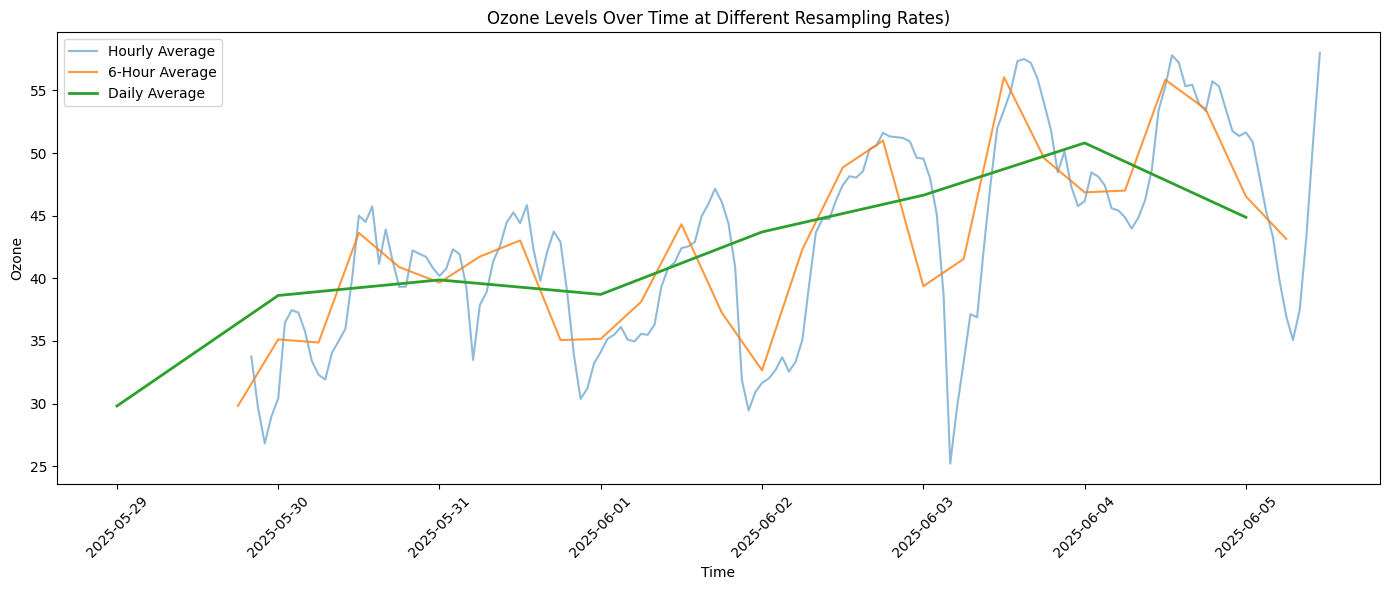

In [96]:
#ensure timestamp is datetime format
wf_dataframe["timestamp_local"] = pd.to_datetime(wf_dataframe["timestamp_local"])
wf_dataframe = wf_dataframe.set_index("timestamp_local")

#resample for hourly, 6 hour, then 1 day averages
ozone_hourly = wf_dataframe["o3"].resample("1h").mean()
ozone_6hour = wf_dataframe["o3"].resample("6h").mean()
ozone_daily = wf_dataframe["o3"].resample("1D").mean()

plt.figure(figsize=(14, 6))

plt.plot(ozone_hourly, label="Hourly Average", alpha=0.5)
plt.plot(ozone_6hour, label="6-Hour Average", alpha=0.8)
plt.plot(ozone_daily, label="Daily Average", linewidth=2)

plt.title("Ozone Levels Over Time at Different Resampling Rates)")
plt.xlabel("Time")
plt.ylabel("Ozone")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#seems to be a longer trend upward since the first of June
